## Procedure to build Classification/ Regression neural network models
1. Load datasets using keras.
2. Build model using sequential API.
3. Compile the model (Specifying loss, optimizer and extra metrics.
4. Train the model(Feed the datasets to the model).
5. Evaluate the model(on test datasets).
6. Using the model to make predictions


In [1]:
import numpy as np; import pandas as pd; import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf; from tensorflow import keras

2023-08-18 21:35:53.577637: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [4]:
# load datasets
fashion = keras.datasets.fashion_mnist
(X_train_full,y_train_full),(X_test,y_test) = fashion.load_data()

In [5]:
X_train,X_val= X_train_full[5000:]/255,X_train_full[:5000]/255
y_train,y_val = y_train_full[5000:],y_train_full[:5000]

In [6]:
# Image Classifaction model
model = keras.models.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                                keras.layers.Dense(300, activation='relu'),
                                keras.layers.Dense(100,activation='relu'),
                                keras.layers.Dense(10,activation='softmax')])



In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
# Compile the model
model.compile(loss='sparse_categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

In [9]:
HS = model.fit(X_train,y_train,epochs=30,validation_data=(X_val,y_val))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7229 - accuracy: 0.7626 - val_loss: 0.5022 - val_accuracy: 0.8286
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4891 - accuracy: 0.8296 - val_loss: 0.4686 - val_accuracy: 0.8354
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4437 - accuracy: 0.8440 - val_loss: 0.4269 - val_accuracy: 0.8532
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4164 - accuracy: 0.8538 - val_loss: 0.4254 - val_accuracy: 0.8466
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3965 - accuracy: 0.8602 - val_loss: 0.4181 - val_accuracy: 0.8560
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3799 - accuracy: 0.8658 - val_loss: 0.3803 - val_accuracy: 0.8698
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3676 - accuracy: 0.8696 - val_loss: 0.3879 - val_accuracy:

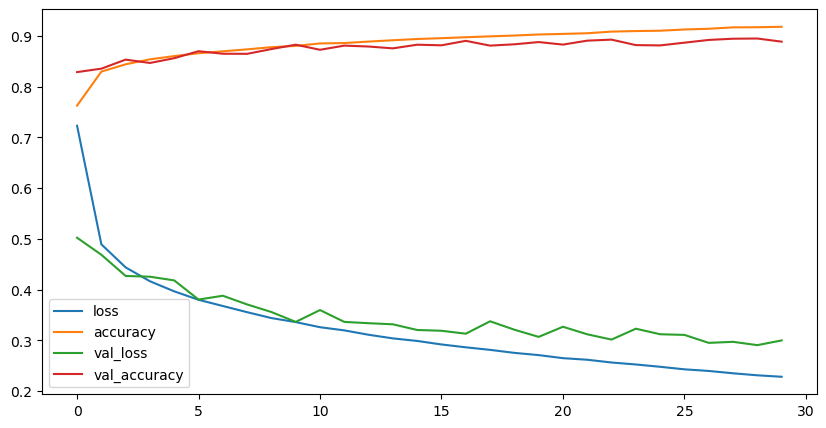

In [10]:
pd.DataFrame(HS.history).plot(figsize=(10,5))

plt.show()

In [11]:
y_pred = model.predict(X_test[:5])
y_pred

1/1 [==============================] - 0s 96ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [12]:
y_test[:5]

array([9, 2, 1, 1, 6], dtype=uint8)

In [13]:
np.argmax(y_pred,axis=1)

array([9, 2, 1, 1, 6])

In [14]:
class_names = ['T-shit/top','Trouser','Pollover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

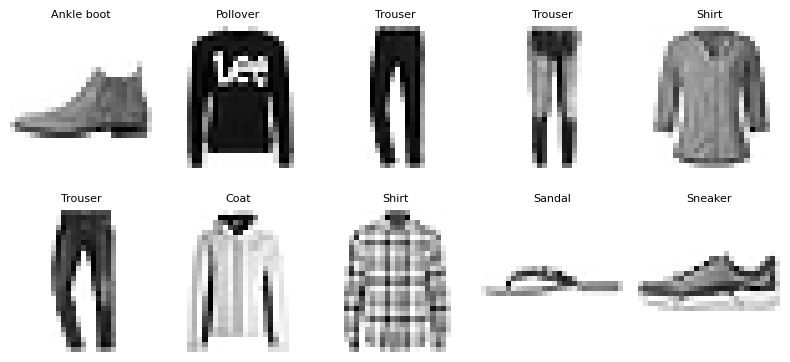

In [15]:
plt.figure(figsize=(8,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_test[i],cmap='binary')
    plt.title(class_names[y_test[i]],fontsize=8)
    plt.axis('off')
plt.tight_layout()
plt.show()

In [16]:
## Build complex model using the Sequential API
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import PolynomialFeatures, StandardScaler


In [17]:
housing=fetch_california_housing()
x_trainf,x_test, y_trainf,y_test = train_test_split(housing.data, housing.target, random_state=42)

In [18]:
print(x_trainf.shape,x_test.shape[1:])

(15480, 8) (8,)


In [19]:
# Regression model
model = keras.models.Sequential([
    keras.layers.Dense(30,activation='relu',input_shape=(8,)),
    keras.layers.Dense(1)
])

In [20]:
x_train,x_val,y_train,y_val = train_test_split(x_trainf,y_trainf,random_state=42)

In [21]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)
x_test = scaler.transform(x_test)


In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 30)                270       
                                                                 
 dense_4 (Dense)             (None, 1)                 31        
                                                                 
Total params: 301 (1.18 KB)
Trainable params: 301 (1.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
#Compile the model
model.compile(loss='mse',optimizer = keras.optimizers.SGD(learning_rate=0.001))

In [24]:
#train the model on training dateset
HIS = model.fit(x_train,y_train, epochs=20,validation_data = (x_val,y_val))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 2.0346 - val_loss: 1.2790
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7959 - val_loss: 0.7488
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7062 - val_loss: 0.6581
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6601 - val_loss: 0.6215
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6238 - val_loss: 0.6168
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5938 - val_loss: 0.5815
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5676 - val_loss: 0.5627
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5451 - val_loss: 0.5433
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5251 - val_loss: 0.5226
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5083 - val_loss: 0.5091

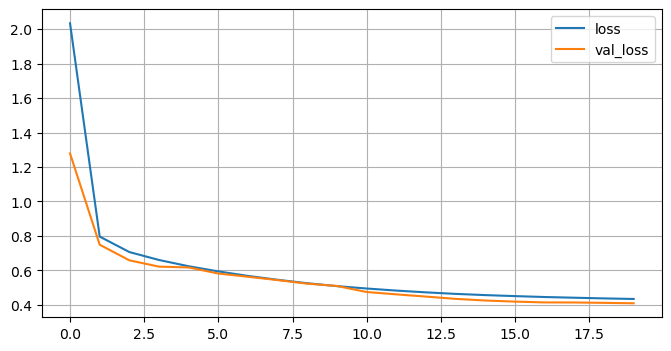

In [25]:
pd.DataFrame(HIS.history).plot(figsize=(8,4))
plt.grid(True)
plt.show()

In [26]:
#Evaluating the model
model.evaluate(x_test,y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.4245


0.42449742555618286

In [27]:
y_predd = model.predict(x_test[:3])
y_predd

1/1 [==============================] - 0s 56ms/step


array([[0.5274335],
       [1.7111992],
       [3.0037222]], dtype=float32)

In [28]:
y_test[:3]

array([0.477  , 0.458  , 5.00001])

### Building complex model using the functional API

In [29]:
# Regression model using functional API
input_ = keras.layers.Input(shape=(8,))
hidden1 = keras.layers.Dense(30,activation='relu')(input_) # only one input
hidden2 = keras.layers.Dense(30,activation='relu')(hidden1)
concat = keras.layers.concatenate([input_,hidden2])
output=keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_],outputs=[output])


In [30]:
model.compile(loss='mse',optimizer=keras.optimizers.SGD(learning_rate=0.001))# Regression model may not need  metrics

In [31]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 8)]                  0         []                            
                                                                                                  
 dense_5 (Dense)             (None, 30)                   270       ['input_1[0][0]']             
                                                                                                  
 dense_6 (Dense)             (None, 30)                   930       ['dense_5[0][0]']             
                                                                                                  
 concatenate (Concatenate)   (None, 38)                   0         ['input_1[0][0]',             
                                                                     'dense_6[0][0]']         

In [32]:
HF = model.fit(x_train,y_train, epochs=20, validation_data=(x_val,y_val))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.6890 - val_loss: 1.0883
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7214 - val_loss: 0.7234
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6540 - val_loss: 0.6194
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6112 - val_loss: 0.5867
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5806 - val_loss: 0.5513
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5552 - val_loss: 0.5278
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5352 - val_loss: 0.5084
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5183 - val_loss: 0.5029
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5038 - val_loss: 0.4822
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4919 - val_loss: 0.4771

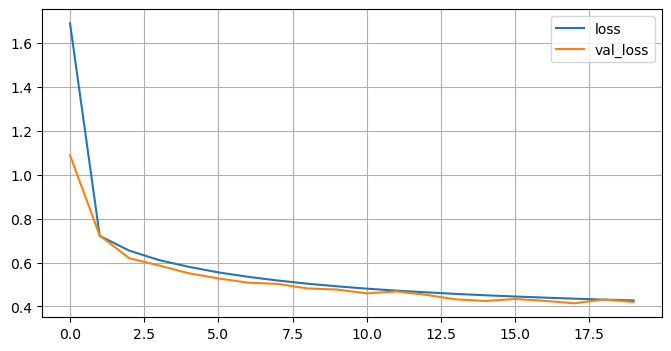

In [33]:
pd.DataFrame(HF.history).plot(figsize=(8,4))
plt.grid(True)
plt.show()

In [34]:
model.evaluate(x_test,y_test) # estimate the generalization error 

162/162 [==============================] - 0s 1ms/step - loss: 0.4154


0.41540342569351196

In [35]:
y_pd = model.predict(x_test[:5])
y_pd

1/1 [==============================] - 0s 61ms/step


array([[0.5561128],
       [1.6225805],
       [3.2270591],
       [2.5801952],
       [2.6749163]], dtype=float32)

In [36]:
# send a subset of features through the wide path
input_A = keras.layers.Input(shape=[5],name='wide_input')
input_B = keras.layers.Input(shape=[6],name='deep_input')
hidden1 = keras.layers.Dense(30,activation='relu')(input_B)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([input_A,hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_A,input_B],outputs=[output])

In [37]:
x_train_A,x_train_B = x_train[:,:5],x_train[:,2:]
x_val_A,x_val_B = x_val[:,:5],x_val[:,2:]
x_test_A,x_test_B = x_test[:,:5],x_test[:,2:]
x_new_A,x_new_B = x_test_A[:3],x_test_B[:3]

In [38]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 deep_input (InputLayer)     [(None, 6)]                  0         []                            
                                                                                                  
 dense_8 (Dense)             (None, 30)                   210       ['deep_input[0][0]']          
                                                                                                  
 wide_input (InputLayer)     [(None, 5)]                  0         []                            
                                                                                                  
 dense_9 (Dense)             (None, 30)                   930       ['dense_8[0][0]']             
                                                                                            

In [39]:
#Compile the model  
model.compile(loss=['mse'],optimizer = keras.optimizers.SGD(learning_rate=0.001))

In [40]:
History=model.fit({'wide_input':x_train_A,'deep_input':x_train_B},y_train, 
          epochs=20, validation_data=((x_val_A,x_val_B),y_val))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 2.2164 - val_loss: 1.9229
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.8749 - val_loss: 0.7522
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7450 - val_loss: 0.6797
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6907 - val_loss: 0.6365
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6527 - val_loss: 0.6024
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6222 - val_loss: 0.5806
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5968 - val_loss: 0.5498
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5751 - val_loss: 0.5294
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5559 - val_loss: 0.5129
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5397 - val_loss: 0.4983

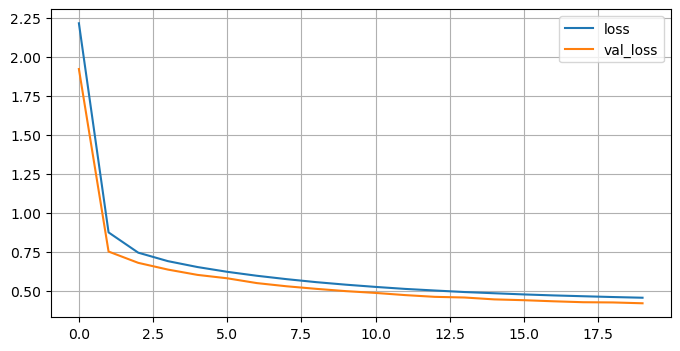

In [41]:
pd.DataFrame(History.history).plot(figsize=(8,4))
plt.grid(True)
plt.show()

In [42]:
#Evaluateing the model
model.evaluate({'wide_input':x_test_A,'deep_input':x_test_B},y_test )

162/162 [==============================] - 0s 1ms/step - loss: 0.4534


0.4533732533454895

In [43]:
model.predict((x_new_A,x_new_B) )

1/1 [==============================] - 0s 68ms/step


array([[0.40573826],
       [1.8370628 ],
       [3.016693  ]], dtype=float32)

In [44]:
model.evaluate((x_test_A,x_test_B),y_test )

162/162 [==============================] - 0s 1ms/step - loss: 0.4534


0.4533732533454895

## Multiple outputs model using functional API

In [45]:
# Regression model with multi inputs and outputs
input_A = keras.layers.Input(shape=[5],name='wide_input')
input_B = keras.layers.Input(shape=[6],name='deep_input')
hidden1 = keras.layers.Dense(30,activation='relu')(input_B)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([input_A,hidden2])
output = keras.layers.Dense(1,name='main_output')(concat)
Auxput = keras.layers.Dense(1,name='Aux_output')(hidden2)
model = keras.Model(inputs=[input_A,input_B],outputs=[output,Auxput])

In [46]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 deep_input (InputLayer)     [(None, 6)]                  0         []                            
                                                                                                  
 dense_11 (Dense)            (None, 30)                   210       ['deep_input[0][0]']          
                                                                                                  
 wide_input (InputLayer)     [(None, 5)]                  0         []                            
                                                                                                  
 dense_12 (Dense)            (None, 30)                   930       ['dense_11[0][0]']            
                                                                                            

In [47]:
# Compile the model
model.compile(loss=['mse','mse'],optimizer='sgd',loss_weights=[0.9,0.1])

In [48]:
# training the model
history = model.fit((x_train_A,x_train_B),(y_train,y_train),epochs=20,
                    validation_data=((x_val_A,x_val_B),(y_val,y_val)))

Epoch 1/20
363/363 [==============================] - 2s 3ms/step - loss: 0.9487 - main_output_loss: 0.7855 - Aux_output_loss: 2.4177 - val_loss: 2.7356 - val_main_output_loss: 2.8911 - val_Aux_output_loss: 1.3366
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5505 - main_output_loss: 0.4983 - Aux_output_loss: 1.0196 - val_loss: 0.7370 - val_main_output_loss: 0.7063 - val_Aux_output_loss: 1.0125
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4900 - main_output_loss: 0.4480 - Aux_output_loss: 0.8676 - val_loss: 0.8935 - val_main_output_loss: 0.9029 - val_Aux_output_loss: 0.8089
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4954 - main_output_loss: 0.4648 - Aux_output_loss: 0.7712 - val_loss: 6.7580 - val_main_output_loss: 7.3595 - val_Aux_output_loss: 1.3441
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4922 - main_output_loss: 0.4661 - Aux_output_loss: 0.7274 - val_loss

In [49]:
HH = pd.DataFrame(history.history)

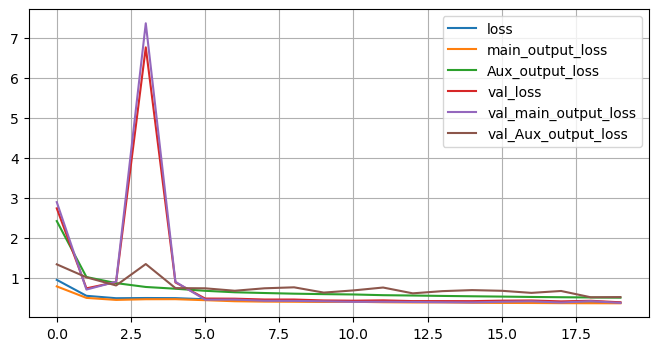

In [50]:
HH.plot(figsize=(8,4))
plt.grid(True)
plt.show()

In [51]:
# Evaluate the model
total_loss, main_loss, aux_loss = model.evaluate([x_test_A,x_test_B],[y_test,y_test])

162/162 [==============================] - 0s 1ms/step - loss: 0.3730 - main_output_loss: 0.3604 - Aux_output_loss: 0.4865


In [52]:
# Making prediction
y_pred_main,y_pred_aux = model.predict([x_new_A,x_new_B])

1/1 [==============================] - 0s 73ms/step


In [53]:
y_pred_main

array([[0.5202087],
       [1.7907102],
       [3.6299715]], dtype=float32)

In [54]:
total_loss, main_loss, aux_loss = model.evaluate([x_test_A,x_test_B],[y_test,y_test])

1/1 [==============================] - 0s 21ms/step


[array([[0.5202087],
        [1.7907102],
        [3.6299715]], dtype=float32),
 array([[0.7297406],
        [2.0234663],
        [3.1914148]], dtype=float32)]

## Using the Subclassing API to build Dynamic models
Notes:
- Both the Sequential API and Functional API are declarative.
- Starting by declaring which layers you want to use and how they should be connected.
- Only then  can you start feeding the model some data for training or infernece.
- The whole model is static graph of layers.

In [63]:
class WideAndDeepModel(keras.Model):
    def __init__(self, units=30, activation='relu',**kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
    def call(self,inputs):
        input_A,input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A,hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output
        

In [64]:
model = WideAndDeepModel()

In [65]:
model.compile(loss="mse",loss_weights=[0.9,0.1],optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3))


In [66]:
history = model.fit([x_train_A,x_train_B],[y_train,y_train],epochs=20,
                    validation_data=([x_val_A,x_val_B],[y_val,y_val]))

Epoch 1/20
363/363 [==============================] - 2s 3ms/step - loss: 2.8509 - output_1_loss: 2.5868 - output_2_loss: 5.2281 - val_loss: 1.8911 - val_output_1_loss: 1.2959 - val_output_2_loss: 7.2480
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 1.2053 - output_1_loss: 0.9488 - output_2_loss: 3.5140 - val_loss: 1.4332 - val_output_1_loss: 0.6957 - val_output_2_loss: 8.0707
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.8418 - output_1_loss: 0.6537 - output_2_loss: 2.5348 - val_loss: 1.3982 - val_output_1_loss: 0.6083 - val_output_2_loss: 8.5075
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7236 - output_1_loss: 0.5808 - output_2_loss: 2.0089 - val_loss: 1.3246 - val_output_1_loss: 0.5308 - val_output_2_loss: 8.4691
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6643 - output_1_loss: 0.5464 - output_2_loss: 1.7252 - val_loss: 1.1952 - val_output_1_loss: 0.5010 - val_ou

In [67]:
model.summary()

Model: "wide_and_deep_model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            multiple                  210       
                                                                 
 dense_22 (Dense)            multiple                  930       
                                                                 
 dense_23 (Dense)            multiple                  36        
                                                                 
 dense_24 (Dense)            multiple                  31        
                                                                 
Total params: 1207 (4.71 KB)
Trainable params: 1207 (4.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


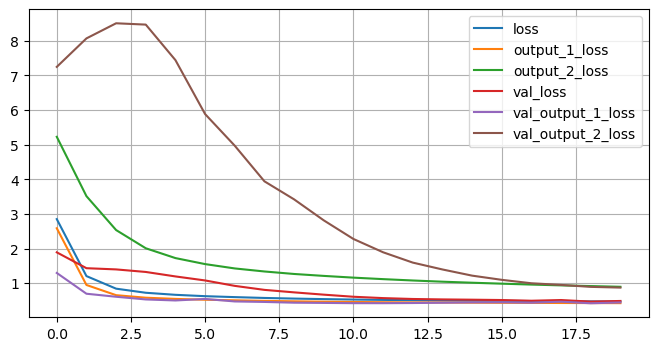

In [68]:
pd.DataFrame(history.history).plot(figsize=(8,4))
plt.grid(True)
plt.show()

In [69]:
total_loss, main_loss, aux_loss = model.evaluate([x_test_A,x_test_B],[y_test,y_test])

162/162 [==============================] - 0s 2ms/step - loss: 0.4607 - output_1_loss: 0.4159 - output_2_loss: 0.8641


In [71]:
y_test[:3]

array([0.477  , 0.458  , 5.00001])

In [74]:
 model.predict([x_new_A,x_new_B])

1/1 [==============================] - 0s 22ms/step


(array([[0.4881492],
        [2.0280838],
        [3.1712062]], dtype=float32),
 array([[1.3925087],
        [2.0449882],
        [2.5082743]], dtype=float32))